In [ ]:
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

In [1]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many records we will display
plt.figure(figsize=(2, 2))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, ))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

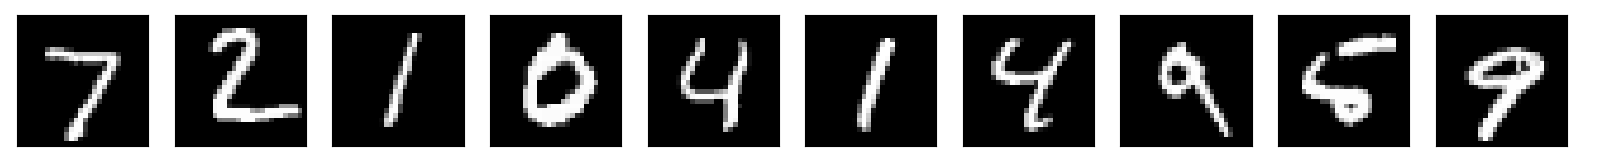

In [4]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, UpSampling2D, Reshape

In [5]:
encode_model = Sequential()

############
# Encoding #
############

## FIRST SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2),  padding='same'))

## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation = 'same', padding='relu'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2), padding='sigmoid'))

encode_model.add(Flatten(input_shape=[7,7,8]))
encode_model.add(Dense(7*7*8, activation="relu"))
encode_model.add(Dense(30, activation="relu"))

In [6]:
############
# Decoding #
############
decode_model=Sequential()

decode_model.add(Dense(7*7*8,activation="relu"))
decode_model.add(Reshape([7,7,8]))

# DeConv1
decode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# Upsampling LAYER
decode_model.add(UpSampling2D((2, 2)))

# Deconv2
decode_model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
decode_model.add(UpSampling2D((2, 2)))

decode_model.add(Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'))


In [7]:
autoencoder = Sequential([encode_model, decode])

In [8]:
encoder.compile(optimizer='adadellta', loss='binary', metrics=['accuracy'])

In [ ]:
autoecoder.summarize()

In [ ]:
from tensorflow.keras import models

In [ ]:
autoencoder.save('Conv_autoencoder.keras')

In [ ]:
encode_model.summary()

In [ ]:
decode.summary()

In [12]:
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train/255
x_train.shape()

(60000, 28, 28, 1)

In [ ]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255
x_test.shape

In [ ]:
# Train the model

history = autoencoder.fit(x=x_train, y=x_train,  epochs=10, batch_size=128, shuffle=True, verbose=1, validation_data=(x_test, y_test))

In [ ]:
losses = history.history['loss']
losses_val = history.history['val_loss']
epochs = range(1, len(losses) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, losses, 'bo', label='Training loss')
plt.plot(epochs, losses_val, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function - binary_crossentropy')
plt.legend()
plt.show()

In [ ]:
accuracy_array = history.history['accuracy']
val_accuracy_array = history.['val_accuracy']
epochs = range(1, len(accuracy_array) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_array, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_array, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range():
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


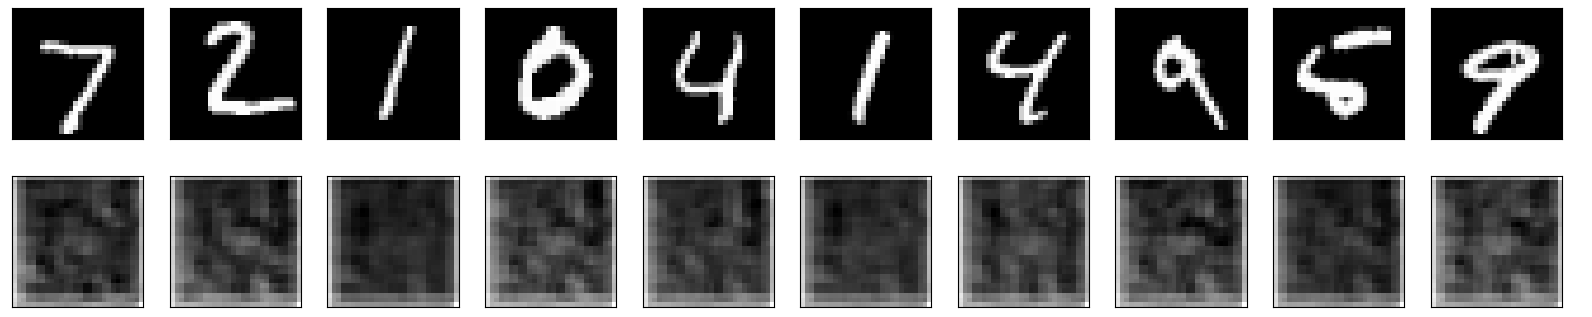

In [5]:
# optimizer is not so good,
# epoch number should be edded

## Lab Logbook requirement:

1) Copy the autoencoder model and train it with epochs=Z+40,
where your SID is: XXXXXXZ
Leave other parameters the same as in Task 2.

2) Please only add to your Lab Logbook print-screens of:
- Table of your model autoencoder.summary()
- Code of your autoencoder.fit()
- Accuracy detailed graph
- Document the plot of the decoded images for task 2. Change the colour, appearance, and shape of the plot according to your own choice (see plt.figure() parameters).


NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.

In [ ]:
# autoencoder_2 = models.load_model('Conv_autoencoder.keras')

In [ ]:
# history_2 = 

In [ ]:
#
#
#
